# Data Analysis and Vis, HW 5
*Adapted from COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: July 9

In this homework, you will use classification methods to classify handwritten digits (Part 1) and predict the popularity of online news (Part 2). We hope these exercises will give you an idea of the broad usage of classificaiton methods. 

In [2]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part1: MNIST handwritten digits

THE MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can use all the classifcation algorithms we studied on them.  We saw these in class when we looked at clustering methods.

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) gives a comparison of a variety of different classification methods on MNIST (Note that the tests on this website are for higher resolution images than we'll use.) 

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10 (one for each digit)
* Samples total: 1797
* Samples per class: $\approx$180
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms, which will also alter their appearance when we plot them. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [2]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [3]:
# this is what one digit (a zero) looks like
print("===\nThe raw data")
print(digits.images[0])
print("===\nThe scaled data")
print(X[0])
print("===\nThe digit")
print(digits.target[0])

===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -

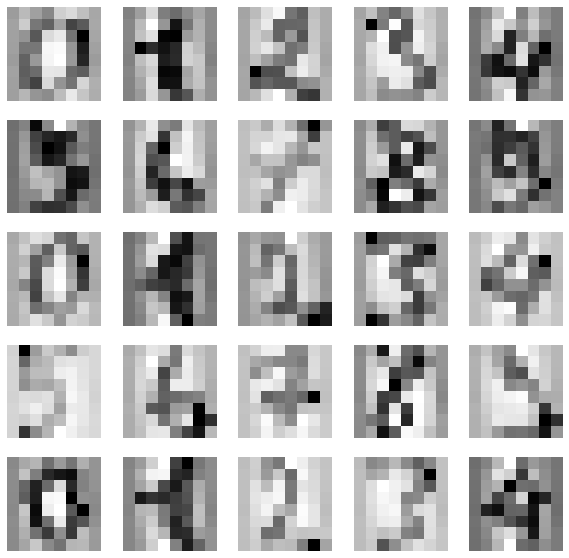

In [4]:
plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

You might find [this webpage](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) helpful. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
+ Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
+ Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? 
+ Print all of these misclassified digits as images. 
+ Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value? 
+ Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 140   0   0  12   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   4   0   1   0   1   0   1 126   0]
 [  0   2   0   2   0   3   1   2   2 140]]
Accuracy =  0.952712100139082


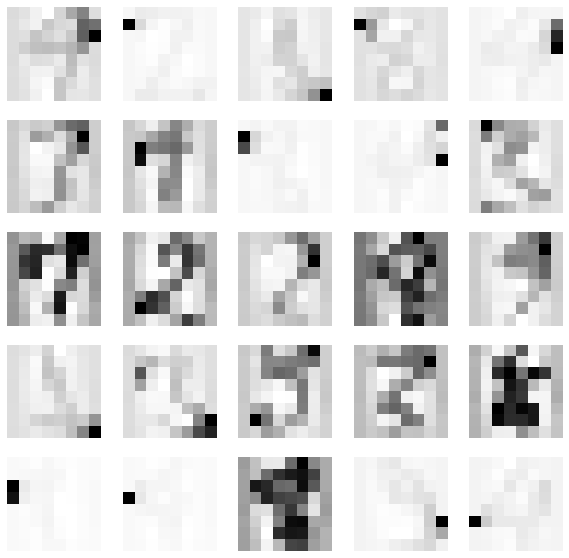

In [5]:
# your solution goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
model = svm.SVC(kernel='rbf', gamma='auto', C=100)
model.fit(X_train, y_train)

print('Confusion Matrix:')
y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

misclassified = np.where(y_test != model.predict(X_test))
missedArray = []

for missed in misclassified:
    missedArray.append(X_test[missed])

plt.figure(figsize= (10, 10))
for miss in missedArray:
    for ii in np.arange(25):
        plt.subplot(5, 5, ii+1)
        plt.imshow(np.reshape(miss[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
        plt.axis('off')
plt.show()
    

[  1.           6.04040404  11.08080808  16.12121212  21.16161616
  26.2020202   31.24242424  36.28282828  41.32323232  46.36363636
  51.4040404   56.44444444  61.48484848  66.52525253  71.56565657
  76.60606061  81.64646465  86.68686869  91.72727273  96.76767677
 101.80808081 106.84848485 111.88888889 116.92929293 121.96969697
 127.01010101 132.05050505 137.09090909 142.13131313 147.17171717
 152.21212121 157.25252525 162.29292929 167.33333333 172.37373737
 177.41414141 182.45454545 187.49494949 192.53535354 197.57575758
 202.61616162 207.65656566 212.6969697  217.73737374 222.77777778
 227.81818182 232.85858586 237.8989899  242.93939394 247.97979798
 253.02020202 258.06060606 263.1010101  268.14141414 273.18181818
 278.22222222 283.26262626 288.3030303  293.34343434 298.38383838
 303.42424242 308.46464646 313.50505051 318.54545455 323.58585859
 328.62626263 333.66666667 338.70707071 343.74747475 348.78787879
 353.82828283 358.86868687 363.90909091 368.94949495 373.98989899
 379.03030

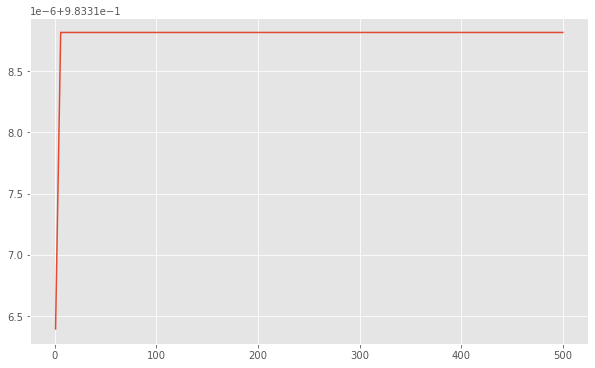

In [6]:
Cs = np.linspace(1,500,100)
print(Cs)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    modelC = svm.SVC(kernel='rbf',gamma='scale', C = C)
    modelC.fit(X_train, y_train)
    scores = cross_val_score(estimator = modelC, X = X_test, y = y_test, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

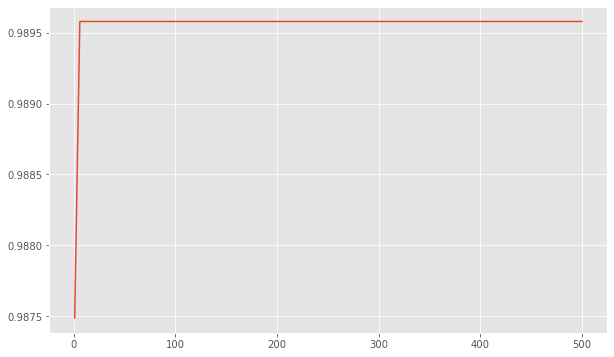

In [7]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=1, test_size=0.8)
Cs = np.linspace(1,500,100)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    modelC = svm.SVC(kernel='rbf',gamma='scale', C = C)
    modelC.fit(X_train, y_train)
    scores = cross_val_score(estimator = modelC, X = X_test, y = y_test, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

**Your Interpretation**: 

    From what I can see the hardest number for the model to predict is the number 8, getting it right only 126 out of 130 times. The numbers that it gets confused with are 4, 3, and 2. To me, that is strange that the number 2 and 8 are being mixed up but I can understand 3,4 and 8.  

    For the best value to use for C in the cross-validation it looks like anything greater than 10 works well. 

    When using the raw values my accuracy score went way up. I feel this is expected with there being more data to work with. 
 

### Task 1.2: Prediction with k-nearest neighbors
Repeat task 1.1 using k-nearest neighbors (k-NN). In part 1, use k=10. In part 5, find the best value of k. 

Confusion Matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 132  14   0   0   1   1   0   1   0]
 [  3   4 117   2   0   0   0   1  15   0]
 [  1   0   1 132   0   1   0   5   5   2]
 [  2   2   0   0 142   1   0   4   1   0]
 [  1   2   0   6   1 128   1   0   2   6]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   1   0   0   0   0 139   0   0]
 [  1  10   1   7   0   0   1   2 109   2]
 [  6  10   0  14   0   2   0  11   7 102]]
Accuracy =  0.885952712100139


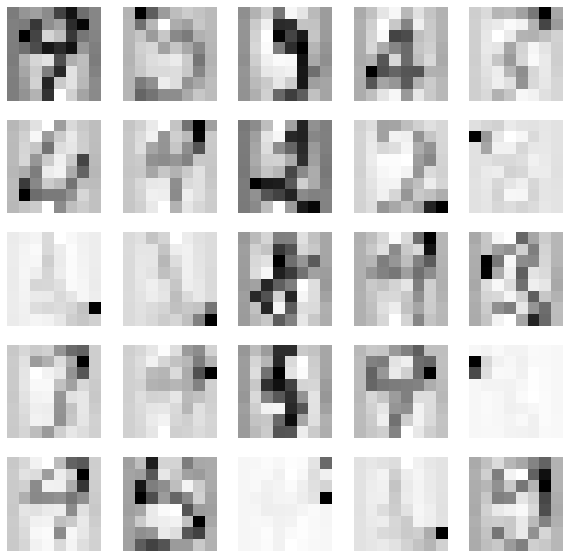

In [8]:
# your solution goes here

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
model = KNeighborsClassifier(n_neighbors = 20)
model.fit(X_train, y_train)

print('Confusion Matrix:')
y_pred = model.predict(X_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

misclassified = np.where(y_test != model.predict(X_test))
missedArray = []

for missed in misclassified:
    missedArray.append(X_test[missed])

plt.figure(figsize= (10, 10))
for miss in missedArray:
    for ii in np.arange(25):
        plt.subplot(5, 5, ii+1)
        plt.imshow(np.reshape(miss[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
        plt.axis('off')
plt.show()



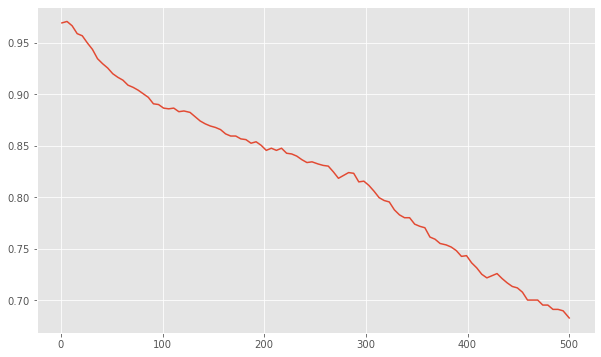

In [9]:
Ks = np.linspace(1,500,100).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
Accuracies = np.zeros(Ks.shape[0])
for i,k in enumerate(Ks): 
    modelK = KNeighborsClassifier(n_neighbors = k)
    modelK.fit(X_train, y_train)
    scores = cross_val_score(estimator = modelK, X = X_test, y = y_test, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Ks,Accuracies)
plt.show()

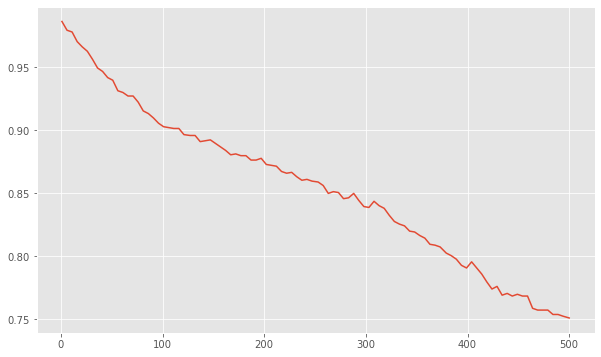

In [10]:
Ks = np.linspace(1,500,100).astype(int)
X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=1, test_size=0.8)
Accuracies = np.zeros(Ks.shape[0])
for i,k in enumerate(Ks): 
    modelK = KNeighborsClassifier(n_neighbors = k)
    modelK.fit(X_train, y_train)
    scores = cross_val_score(estimator = modelK, X = X_test, y = y_test, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Ks,Accuracies)
plt.show()

**Your Interpretation**:
    
    For the K-NN the most common mistake that the model makes is 8 again. It has a hard time with telling 8 from 3 in the data. 
    
    With changing the K value the best is 0 but this is expected because it will overfit. The accuracies go down as we increase the K value because it slowly turns into underfitting. 

    The Raw data showed not change when it came to accuracies. 


# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset.
* To use [scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.values()* method to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.

In [6]:
# Your code here.  Note the data and description are in the OnlineNewsPopularity directory
rawData = pd.read_csv("OnlineNewsPopularity.csv")
data = rawData.drop(['url',' timedelta', ' shares'],axis =1)
rawShares = rawData[' shares']
sharesMedian = rawShares.median()
shares = rawShares.values
y = rawShares <= sharesMedian
print(y)
X = scale(data.values)

y = y[:5000]
X = X[:5000]

0         True
1         True
2        False
3         True
4         True
         ...  
39639    False
39640    False
39641    False
39642     True
39643     True
Name:  shares, Length: 39644, dtype: bool


### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [12]:
rawShares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [13]:
rawShares.median()

1400.0

There is a huge differance in the min and the max of this data. This could have a big impact on some of our predictions. The Mean is being pulled up from the max number 

### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 

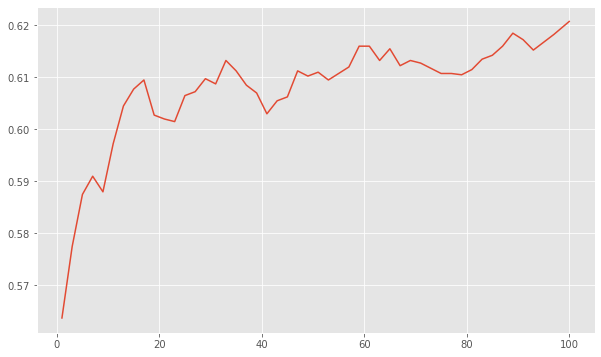

In [10]:
# Your code here
Ks = np.linspace(1,100,50).astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
Accuracies = np.zeros(Ks.shape[0])
for i,k in enumerate(Ks): 
    modelK = KNeighborsClassifier(n_neighbors = k)
    modelK.fit(X_train, y_train)
    scores = cross_val_score(estimator = modelK, X = X_test, y = y_test, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Ks,Accuracies)
plt.show()

**Interpretation:**

    It looks from the data that the best k values to use is 60. But that only gives you an accuracy of of 58.5%. That looks super low to me but that is what the data is reporting. 


### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data. 
 
 * SVM is computationally expensive, so start by using only a fraction of the data, say 5,000 articles. 
 * Experiment with different Cs. Which is the best value for C?

Note that it takes multiple minutes per value of C to run on the whole dataset!

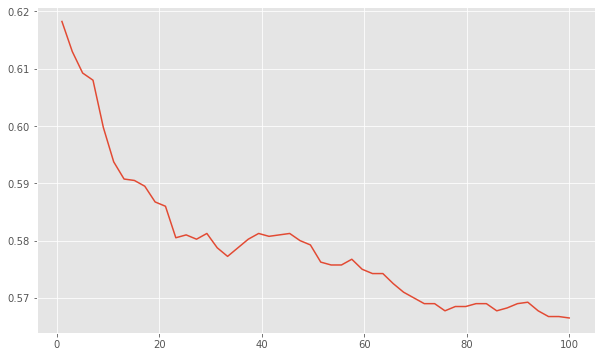

In [21]:
# Your code here
Cs = np.linspace(1,100,50)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    modelC = svm.SVC(kernel='rbf',gamma='scale', C = C)
    modelC.fit(X_train, y_train)
    scores = cross_val_score(estimator = modelC, X = X_test, y = y_test, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

Interpretation:

    From the data that I have run with the SVM, it shows that the lower the number the better the fit. To me, this shows that there is not a strong correlation between the Shares and the other categories 



### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. 

Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 

In [19]:
# Your code here
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)
decisionTree = tree.DecisionTreeClassifier(max_depth=3)
decisionTree = decisionTree.fit(X_train, y_train)
y_pred_train = decisionTree.predict(X_train)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = y_train, y_pred = y_pred_train))
y_pred = decisionTree.predict(X_test)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))
# tree.plot_tree(decisionTree, filled=True, feature_names=all_features);

Accuracy on training data=  0.609
Accuracy on test data=  0.54725


### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
+ How did different parameters influence the accuracy?
+ Which model is easiest do interpret?
+ How would you interpret your results?


**Your Solution:**

    In most of the tests changing the parameters did help with improving the accuracy but overall most of them were low. I’m guessing if I used more data for the training I might be about to improve this but I would run the risk of overfitting, 

    The Easiest for me was the Decision tree. It was a straightforward way to see the data if you did include too many parameters. 

    I feel that with the data at hand that it is hard to find a good way to or correlation with the number of Shares and the items being looked at. 
